In [26]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
import time
from tqdm import tqdm
base_path = os.getcwd()

In [60]:
train_data = pd.read_csv("Train_Data.csv")
fingerprint_0 = pd.read_csv("Fingerprint_0.csv")
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
fingerprint_2 = pd.read_csv("Fingerprint_2.csv")
fingerprint_3 = pd.read_csv("Fingerprint_3.csv")

In [33]:
# # Program to print the train and test scores - Takes a long time to run hence commented 
# def model_data(data):
#     train_data = pd.read_csv("Train_Data.csv")
#     train_size_range = [10,50,100,250,500,750,1000]
#     columns_training = ['H','zpve','alpha','CV','gap']
#     column_labels = ["Atomization","Zero potential","Isotropic polarizability","Heat Capacity","HUMO-LUMO Gap"]
#     train_scores = np.zeros((len(train_size_range),len(column_labels)))
#     test_scores = np.zeros((len(train_size_range),len(column_labels)))
    
#     for train_size,train_size_label in zip(train_size_range,tqdm(range(len(train_size_range)))):
#         train_ratio = train_size/len(train_data)
#         for column,column_label in zip(columns_training,range(len(columns_training))):
#             scaler_y = MinMaxScaler()
#             data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))
#             train_X, test_X, train_Y, test_Y = train_test_split(data,data_y,train_size=train_ratio)
#             kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
#                           param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                                       "gamma": np.logspace(-2, 2, 5)})
#             t0 = time.time()
#             kr.fit(train_X, train_Y)
#             kr_fit = time.time() - t0
#             train_scores[train_size_label,column_label] = kr.score(train_X,train_Y)
#             test_scores[train_size_label,column_label] = kr.score(test_X,test_Y)
# #             print("KRR model fitting + hyperparameter tuning for {} done in =  {} s".format(column,kr_fit))
#     return train_scores,test_scores
# #             print("Train Score -{}".format(kr.score(train_X,train_Y)))
# #             print("Test Score - {}".format(kr.score(test_X,test_Y)))
# #             plt.scatter(scaler_y.inverse_transform(test_Y),scaler_y.inverse_transform(kr.predict(test_X)))
# #             plt.scatter(scaler_y.inverse_transform(train_Y),scaler_y.inverse_transform(kr.predict(train_X)))
# #             plt.axis('square')
# #             plt.show()

## Results obtained through different scaling process are listed below 

For data - 0th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  4.197464227676392 s
Train Score -0.876207473850323
Test Score - 0.23138369784643353
KRR model fitting + hyperparameter tuning for zpve done in =  4.210655689239502 s
Train Score -0.9501885396250842
Test Score - 0.7852422913307245
KRR model fitting + hyperparameter tuning for alpha done in =  3.9243791103363037 s
Train Score -0.72301576112653
Test Score - 0.5423572906532412
KRR model fitting + hyperparameter tuning for CV done in =  4.048789978027344 s
Train Score -0.5131285540848183
Test Score - 0.34278832440201956
KRR model fitting + hyperparameter tuning for gap done in =  3.9505815505981445 s
Train Score -0.31341662647085466
Test Score - 0.3096877597092532
For data - 1th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  3.9465548992156982 s
Train Score -0.8732984105840664
Test Score - 0.7046762296841116
KRR model fitting + hyperparameter tuning for zpve done in =  3

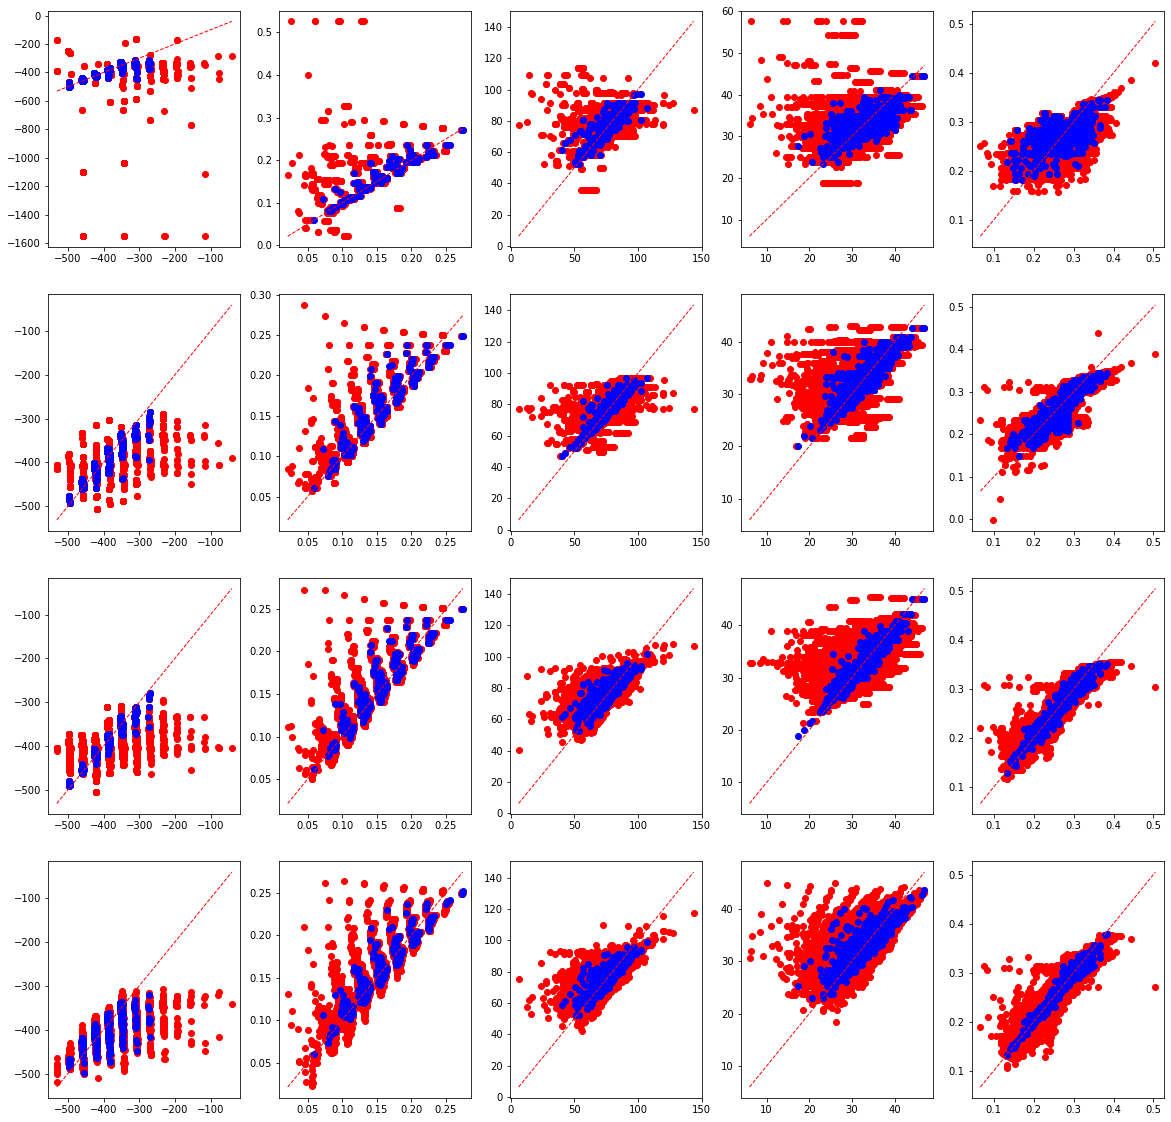

In [87]:
from sklearn.preprocessing import StandardScaler,Normalizer
train_data = pd.read_csv("Train_Data.csv")
train_size = 1000/len(train_data)
fingerprint_0 = pd.read_csv("Fingerprint_0.csv")
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
fingerprint_2 = pd.read_csv("Fingerprint_2.csv")
fingerprint_3 = pd.read_csv("Fingerprint_3.csv")
columns_training = ['H','zpve','alpha','CV','gap']
total_data = [fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3]
fig,axs = plt.subplots(len(total_data),len(columns_training),figsize=(20,20))
for i,data in zip(range(len(total_data)),total_data):
    print("For data - {}th order fingerprint".format(i))
    for j,column in zip(range(len(columns_training)),columns_training):
        scaler_y = StandardScaler()
        data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))
        train_X, test_X, train_Y, test_Y = train_test_split(data,data_y,train_size=train_size,random_state = 43)
        kr = GridSearchCV(KernelRidge(kernel='rbf'),
                      param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                                  "gamma": np.logspace(-2, 2, 5)})
        t0 = time.time()
        kr.fit(train_X, train_Y)
        kr_fit = time.time() - t0
        print("KRR model fitting + hyperparameter tuning for {} done in =  {} s".format(column,kr_fit))
        print("Train Score -{}".format(kr.score(train_X,train_Y)))
        print("Test Score - {}".format(kr.score(test_X,test_Y)))
        axs[i,j].scatter(scaler_y.inverse_transform(test_Y),scaler_y.inverse_transform(kr.predict(test_X)),c='r')
        xpoints = ypoints = [min(train_data[column]),max(train_data[column])]
        axs[i,j].plot(xpoints,ypoints,linestyle='--',color='r',lw=1,scalex=False,scaley=False)
        axs[i,j].scatter(scaler_y.inverse_transform(train_Y),scaler_y.inverse_transform(kr.predict(train_X)),c='b')        
plt.show()

For data - 0th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  3.8605058193206787 s
Train Score -0.9231451569525004
Test Score - 0.8124660246703148
KRR model fitting + hyperparameter tuning for zpve done in =  3.611196279525757 s
Train Score -0.9773992494354391
Test Score - 0.9381875307767552
KRR model fitting + hyperparameter tuning for alpha done in =  3.5155820846557617 s
Train Score -0.6175849604240553
Test Score - 0.5703289243902329
KRR model fitting + hyperparameter tuning for CV done in =  3.7928528785705566 s
Train Score -0.6587010524792516
Test Score - 0.497615868765271
KRR model fitting + hyperparameter tuning for gap done in =  3.5789120197296143 s
Train Score -0.31308168555962546
Test Score - 0.30995628123499475
For data - 1th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  3.8924367427825928 s
Train Score -0.6260978863649778
Test Score - 0.6447388386113073
KRR model fitting + hyperparameter tuning for zpve done in =

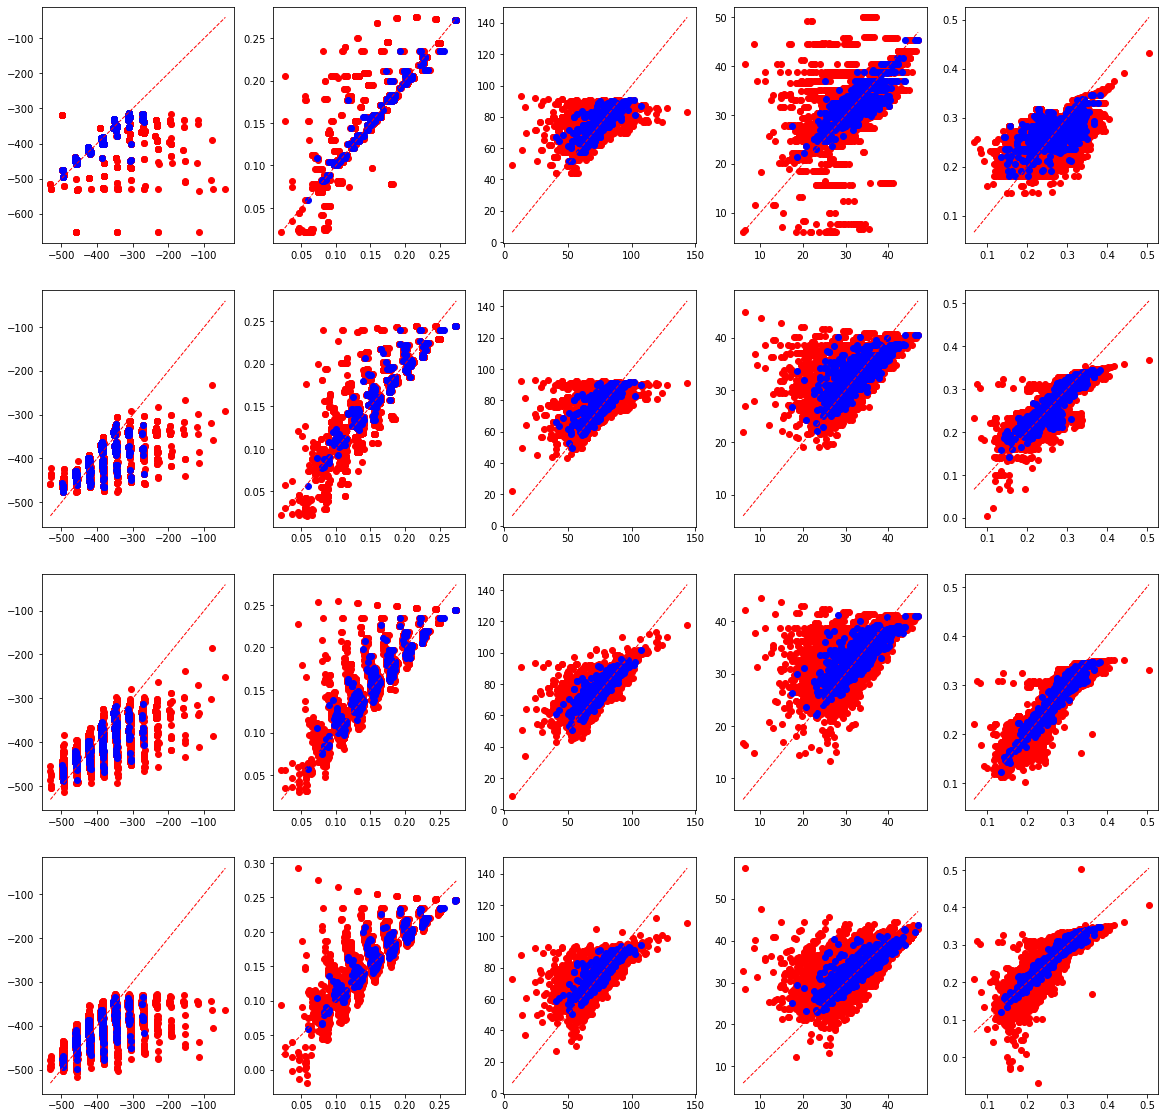

In [86]:
from sklearn.preprocessing import StandardScaler,Normalizer
train_data = pd.read_csv("Train_Data.csv")
train_size = 1000/len(train_data)
fingerprint_0 = pd.read_csv("Fingerprint_0.csv")
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
fingerprint_2 = pd.read_csv("Fingerprint_2.csv")
fingerprint_3 = pd.read_csv("Fingerprint_3.csv")
columns_training = ['H','zpve','alpha','CV','gap']
total_data = [fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3]
fig,axs = plt.subplots(len(total_data),len(columns_training),figsize=(20,20))
for i,data in zip(range(len(total_data)),total_data):
    print("For data - {}th order fingerprint".format(i))
    for j,column in zip(range(len(columns_training)),columns_training):
        scaler_y = MinMaxScaler()
        scaler_x = MinMaxScaler()
        data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))
        data = scaler_x.fit_transform(data)
        train_X, test_X, train_Y, test_Y = train_test_split(data,data_y,train_size=train_size,random_state = 43)
        kr = GridSearchCV(KernelRidge(kernel='rbf'),
                      param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                                  "gamma": np.logspace(-2, 2, 5)})
        t0 = time.time()
        kr.fit(train_X, train_Y)
        kr_fit = time.time() - t0
        print("KRR model fitting + hyperparameter tuning for {} done in =  {} s".format(column,kr_fit))
        print("Train Score -{}".format(kr.score(train_X,train_Y)))
        print("Test Score - {}".format(kr.score(test_X,test_Y)))
        axs[i,j].scatter(scaler_y.inverse_transform(test_Y),scaler_y.inverse_transform(kr.predict(test_X)),c='r')
        xpoints = ypoints = [min(train_data[column]),max(train_data[column])]
        axs[i,j].plot(xpoints,ypoints,linestyle='--',color='r',lw=1,scalex=False,scaley=False)
        axs[i,j].scatter(scaler_y.inverse_transform(train_Y),scaler_y.inverse_transform(kr.predict(train_X)),c='b')        
plt.show()

For data - 0th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  15.759874105453491 s
Train Score -0.9248453060956323
Test Score - 0.8186126841815782
KRR model fitting + hyperparameter tuning for zpve done in =  16.24917960166931 s
Train Score -0.9624782631967138
Test Score - 0.9167810450956483
KRR model fitting + hyperparameter tuning for alpha done in =  16.178404092788696 s
Train Score -0.8375731972174756
Test Score - 0.7173656415904457
KRR model fitting + hyperparameter tuning for CV done in =  16.182825326919556 s
Train Score -0.6093083517580493
Test Score - 0.5169744668257044
KRR model fitting + hyperparameter tuning for gap done in =  15.997952938079834 s
Train Score -0.2880354842923891
Test Score - 0.3134806070192918
For data - 1th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  15.929110050201416 s
Train Score -0.9640821566184397
Test Score - 0.8374141639716953
KRR model fitting + hyperparameter tuning for zpve done in = 

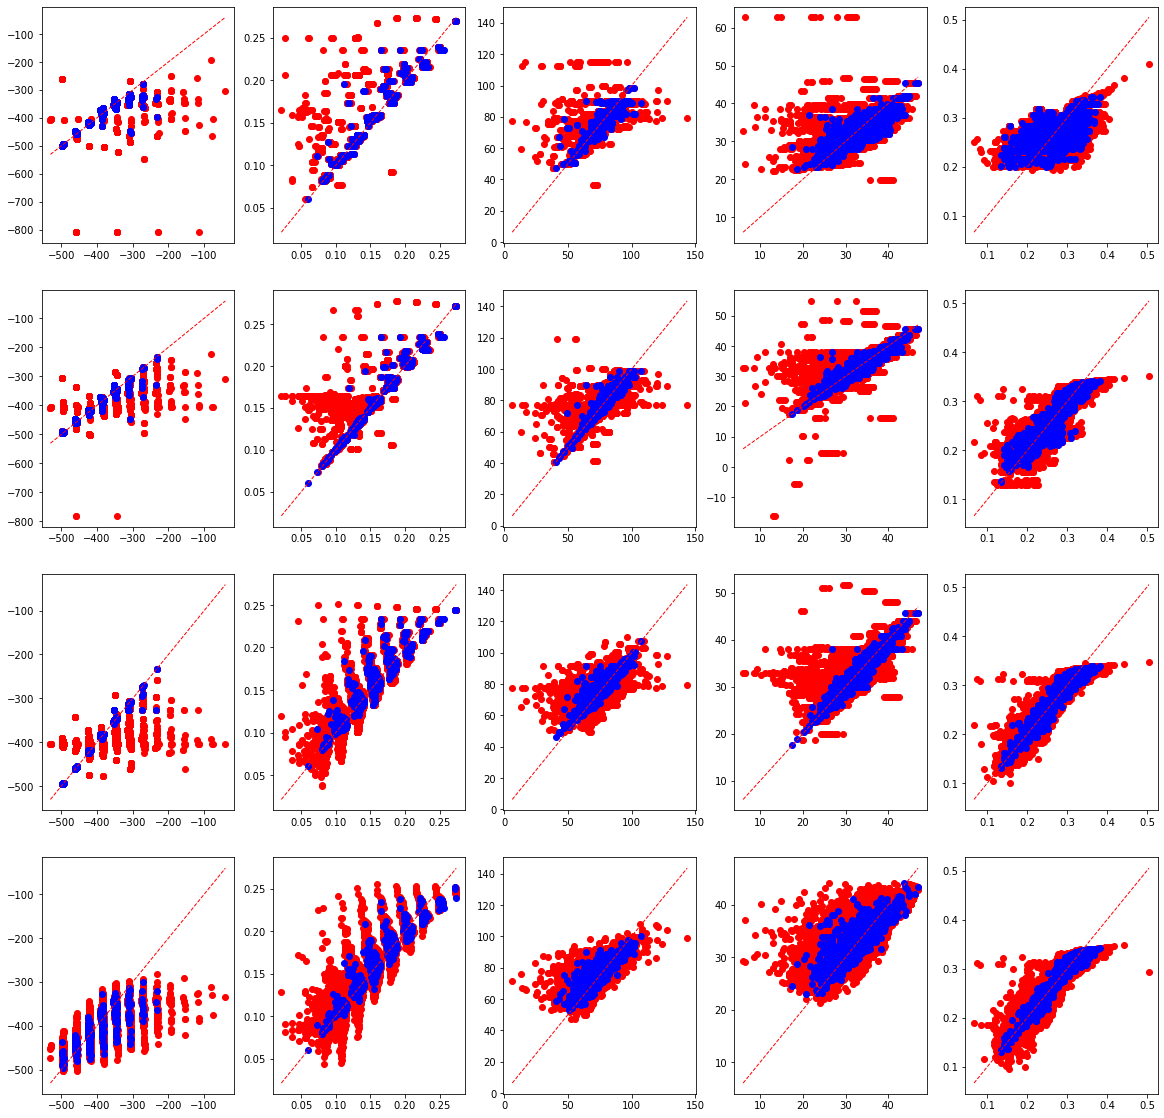

In [82]:
from sklearn.preprocessing import StandardScaler,Normalizer
train_data = pd.read_csv("Train_Data.csv")
train_size = 2000/len(train_data)
fingerprint_0 = pd.read_csv("Fingerprint_0.csv")
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
fingerprint_2 = pd.read_csv("Fingerprint_2.csv")
fingerprint_3 = pd.read_csv("Fingerprint_3.csv")
columns_training = ['H','zpve','alpha','CV','gap']
total_data = [fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3]
fig,axs = plt.subplots(len(total_data),len(columns_training),figsize=(20,20))
for i,data in zip(range(len(total_data)),total_data):
    print("For data - {}th order fingerprint".format(i))
    for j,column in zip(range(len(columns_training)),columns_training):
        scaler_y = StandardScaler()
        scaler_x = Normalizer()
        data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))
        data = scaler_x.fit_transform(data)
        train_X, test_X, train_Y, test_Y = train_test_split(data,data_y,train_size=train_size,random_state = 43)
        kr = GridSearchCV(KernelRidge(kernel='rbf'),
                      param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                                  "gamma": np.logspace(-2, 2, 5)})
        t0 = time.time()
        kr.fit(train_X, train_Y)
        kr_fit = time.time() - t0
        print("KRR model fitting + hyperparameter tuning for {} done in =  {} s".format(column,kr_fit))
        print("Train Score -{}".format(kr.score(train_X,train_Y)))
        print("Test Score - {}".format(kr.score(test_X,test_Y)))
        axs[i,j].scatter(scaler_y.inverse_transform(test_Y),scaler_y.inverse_transform(kr.predict(test_X)),c='r')
        xpoints = ypoints = [min(train_data[column]),max(train_data[column])]
        axs[i,j].plot(xpoints,ypoints,linestyle='--',color='r',lw=1,scalex=False,scaley=False)
        axs[i,j].scatter(scaler_y.inverse_transform(train_Y),scaler_y.inverse_transform(kr.predict(train_X)),c='b')        
plt.show()

For data - 0th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  9.050314903259277 s
Train Score -0.9163032998206573
Test Score - 0.7563272694444163
KRR model fitting + hyperparameter tuning for zpve done in =  8.982381105422974 s
Train Score -0.9633197958726735
Test Score - 0.9232395158038942
KRR model fitting + hyperparameter tuning for alpha done in =  8.77712631225586 s
Train Score -0.6283493043386054
Test Score - 0.5731463854353562
KRR model fitting + hyperparameter tuning for CV done in =  9.333380937576294 s
Train Score -0.6290132506976434
Test Score - 0.46265727649578836
KRR model fitting + hyperparameter tuning for gap done in =  9.102028369903564 s
Train Score -0.31305853408109874
Test Score - 0.3090292535356791
For data - 1th order fingerprint
KRR model fitting + hyperparameter tuning for H done in =  9.166269063949585 s
Train Score -0.891756299517982
Test Score - 0.5936315449500496
KRR model fitting + hyperparameter tuning for zpve done in =  8.85

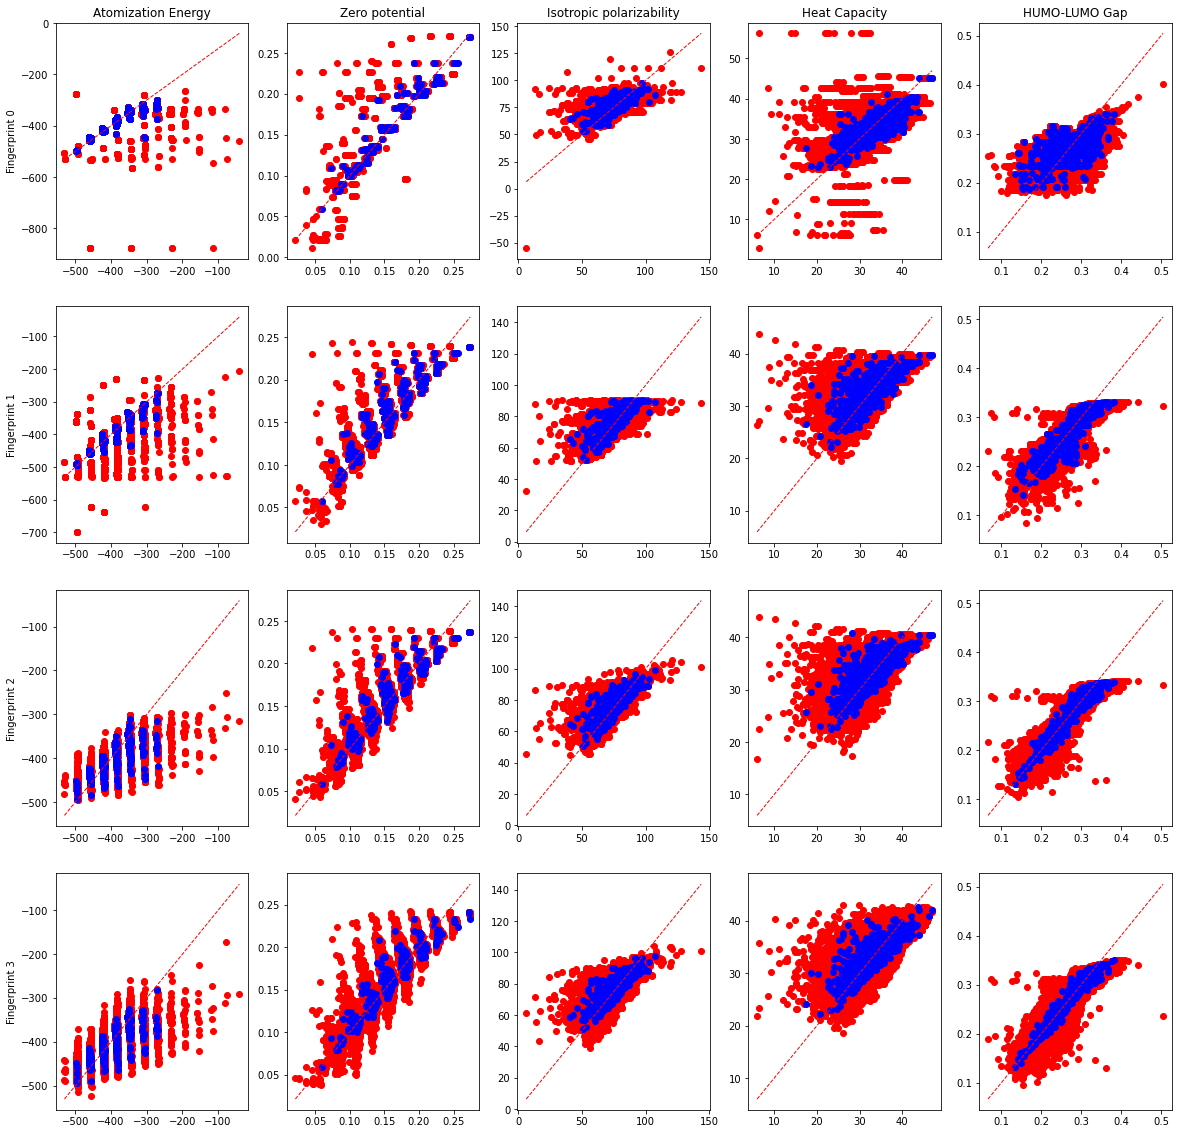

In [98]:
from sklearn.preprocessing import StandardScaler,Normalizer
train_data = pd.read_csv("Train_Data.csv")
train_size = 1000/len(train_data)
fingerprint_0 = pd.read_csv("Fingerprint_0.csv")
fingerprint_1 = pd.read_csv("Fingerprint_1.csv")
fingerprint_2 = pd.read_csv("Fingerprint_2.csv")
fingerprint_3 = pd.read_csv("Fingerprint_3.csv")
columns_training = ['H','zpve','alpha','CV','gap']
column_labels = ["Atomization Energy","Zero potential","Isotropic polarizability","Heat Capacity","HUMO-LUMO Gap"]
total_data = [fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3]
fig,axs = plt.subplots(len(total_data),len(columns_training),figsize=(20,20))
for i,data in zip(range(len(total_data)),total_data):
    print("For data - {}th order fingerprint".format(i))
    for j,column in zip(range(len(columns_training)),columns_training):
        scaler_y = MinMaxScaler()
        scaler_x = Normalizer()
        data_y = scaler_y.fit_transform(np.array(train_data[column]).reshape(-1, 1))
        data = scaler_x.fit_transform(data)
        train_X, test_X, train_Y, test_Y = train_test_split(data,data_y,train_size=train_size,random_state = 43)
        kr = GridSearchCV(KernelRidge(kernel='rbf'),
                      param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3,1e-4],
                                  "gamma": np.logspace(-2, 2, 10)})
        t0 = time.time()
        kr.fit(train_X, train_Y)
        kr_fit = time.time() - t0
        print("KRR model fitting + hyperparameter tuning for {} done in =  {} s".format(column,kr_fit))
        print("Train Score -{}".format(kr.score(train_X,train_Y)))
        print("Test Score - {}".format(kr.score(test_X,test_Y)))
        axs[i,j].scatter(scaler_y.inverse_transform(test_Y),scaler_y.inverse_transform(kr.predict(test_X)),c='r')
        xpoints = ypoints = [min(train_data[column]),max(train_data[column])]
        axs[i,j].plot(xpoints,ypoints,linestyle='--',color='r',lw=1,scalex=False,scaley=False)
        axs[i,j].scatter(scaler_y.inverse_transform(train_Y),scaler_y.inverse_transform(kr.predict(train_X)),c='b')
        if i == 0:
            axs[i,j].set_title(column_labels[j])
        if j == 0:
            ylabel_merged = 'Fingerprint '+str(i)
            axs[i,j].set(ylabel=ylabel_merged)
plt.show()